<a href="https://colab.research.google.com/github/Martinmbiro/Gradient-Boosting-with-CatBoot-for-Classification/blob/main/03%20Model%20Selection%20-%20Binary%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification**
> ❗ **Recall**
+ Since we're only predicting two labels; `0` and `1`, this is a _binary classification_ problem

## Load the data

In [ ]:
# import pandas
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

In [ ]:
# view dataframe information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


> From the previous notebook, we identified the _features_ and _label_ column, hence,  
+ Split the dataset into _features_ and _label_
+ Split features and label into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure',
            'TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'

# features
X, y = diabetes[features], diabetes[label]

# split into training and validation / test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# a peek into the features dataframe
X.sample(3)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
10801,4,170,83,53,440,41.714249,2.284497,61
11828,9,89,52,31,20,21.798068,0.804318,52
7874,0,68,78,11,249,21.457434,0.114636,24


> Specify Indices of _categorical_ and _numeric_ features for the sake of preprocessing

In [ ]:
# numeric
num_feature_indices = [0, 1, 2, 3, 4, 5, 6]

# !Recall Age will be considered a categorical feature
cat_feature_indices = [7]

## Preprocessing [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
> Numerical and categorical _transformers_ will be wrapped within a [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)  
+ To do this, a [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object will be created using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) and a [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) object will be created using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html)

In [ ]:
# import necessary libraries
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# for categorical features
num_transformer = make_pipeline(
    # list of transformer objects to be applied
    SimpleImputer(strategy='median'), # handle missing values if any
    StandardScaler() # scale
)

# for numeric features
cat_transformer = make_pipeline(
    # list of transformer objects to be applied
    SimpleImputer(strategy='most_frequent'), # handle missing values if any
    OneHotEncoder(handle_unknown='ignore') # encode
)

# wrap the above transformers withing a ColumnTransformer
preprocesser = make_column_transformer(
    # (transformer, columns)
    (cat_transformer, cat_feature_indices), # categorical columns
    (num_transformer, num_feature_indices) # numeric columns
)

## [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
+ We'll train a `RandomForestClassifier` using its default parameters
+ Then we'll evaluate the model using classification evaluation metrics

In [ ]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

### **Create and train model**

In [ ]:
%%time
# Pipeline with preprocesser + model
forest_model = Pipeline(steps=[
    # (name, transformer/estimator)
    ('preprocess', preprocesser), # pre-process
    ('rfc', RandomForestClassifier(n_jobs=-1)) # estimator
])

# train the model
forest_model.fit(X_train, y_train)

# make predictions
y_pred = forest_model.predict(X_test)

CPU times: user 5.49 s, sys: 40.6 ms, total: 5.54 s
Wall time: 3.49 s


### **Evaluate**
> For in-depth coverage on classification metrics, see my repository linked [`here`](https://github.com/Martinmbiro/Imbalanced-Datasets-and-Evaluating-Classification-Models)

In [ ]:
# import necessary libraries
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# define function to plot confusion_matrix
def plot_confusion_matrix(y_test, y_pred):
  # specify stylesheet
  plt.style.use('fast')

  # define figure and Axes
  fig, ax = plt.subplots(figsize=(3, 3), layout='constrained')

  # plot confusion_matrix
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                          cmap='Blues',
                                          colorbar=False,
                                          ax=ax)

  # move xticks and xlabel to top
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

  # modify xlabel and ylabel colors
  ax.set_ylabel('Actual Labels', weight='black', color='#003262')
  ax.set_xlabel('Predicted Labels', weight='black', color='#E52B50')

  plt.show()

In [ ]:
# define function for plotting ROC curve and displaying AUC on legend
def plot_roc_curve(model, X_test, y_test):
  # specify figure and Axes
  fig, ax = plt.subplots(figsize=(3.7, 3.7), layout='constrained')

  # plot roc_curve
  RocCurveDisplay.from_estimator(model, X_test, y_test,
                                  drop_intermediate=False,
                                  plot_chance_level=False,
                                  pos_label=1,
                                  name = 'Model',
                                  color='#3457d5', linewidth=1.6,
                                  ax=ax)
  # title and labels:
  ax.set_ylabel('True Positive Rate', weight='black')
  ax.set_xlabel('False Positive Rate', weight='black')
  ax.set_title('ROC Curve & AUC (On the Legend)', fontsize=10.5)
  # legend fontsize
  ax.legend(fontsize=9)

  plt.show()

#### Visualize `confusion_matrix` using [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

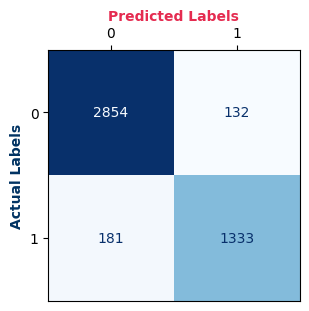

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# actual distribution of labels in test-set (y_test)
y_test.value_counts()

,count
Diabetic,
0,2986
1,1514


#### [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
# generate
cr = classification_report(y_test, y_pred)

# print
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2986
           1       0.91      0.88      0.89      1514

    accuracy                           0.93      4500
   macro avg       0.93      0.92      0.92      4500
weighted avg       0.93      0.93      0.93      4500



#### Visualize [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) and [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
> ❗ **Note**
+ This implementation of [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) is restricted to the binary classification task

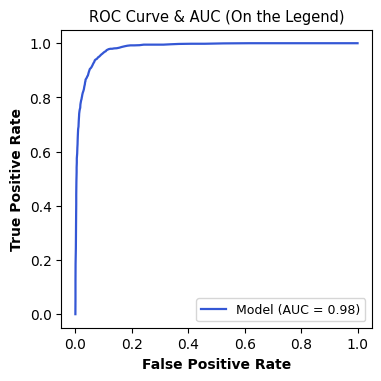

In [ ]:
plot_roc_curve(forest_model, X_test, y_test)

## Resolving the Bias - possibly
> ❗ **Recall**
+ We're working with an _imbalanced_ dataset since the label `1` is under-represented in the dataset, compared to the `0` label. So we'll try and balance them

### **Visualize imbalance**
> Visualize the class imbalance in the _training_ dataset, `y_train`

In [ ]:
# value_counts
y_train.value_counts()

,count
Diabetic,
0,7014
1,3486


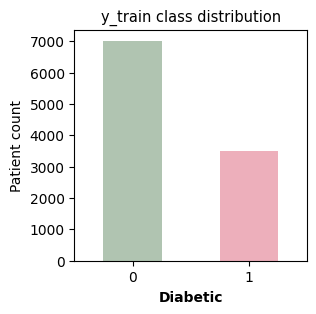

In [ ]:
# plot the value counts of each class in y_train
y_train.value_counts().plot.bar(figsize=(3.0, 3.0),
                                layout='constrained',
                                color=['#b0c4b1', '#edafbb'],
                                rot = 0)

plt.ylabel('Patient count')
plt.xlabel('Diabetic', weight='black')
plt.title('y_train class distribution', fontsize=10.5)
plt.show()

### **Oversampling**  
+ Here, various _oversampling_ techniques were implemented on the training set to ensure classes were equally represented

In [ ]:
# import libraries
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

#### Encoding the `Age` column in the `X_train`

In [ ]:
# make a copy of X_train
X_train_copy = X_train.copy()

# OrdinalEncoder object
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',
                         unknown_value=1000)

# encode the Age column
X_train_copy[['Age']] = encoder.fit_transform(X_train_copy[['Age']])

#### [`imblearn.over_sampling.BorderlineSMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

In [ ]:
# create BorderlineSMOTE object
blsmote = BorderlineSMOTE(random_state=42)

# resample
X_res, y_res = blsmote.fit_resample(X_train_copy, y_train)

# inverse_transform the Age column
X_res[['Age']] = encoder.inverse_transform(X_res[['Age']])

#### [`imblearn.over_sampling.KMeansSMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

In [ ]:
# create KMeansSMOTE object
ksmote = KMeansSMOTE(random_state=42,
                     k_neighbors=2,
                     kmeans_estimator=MiniBatchKMeans(n_init=2))

# resample
X_res, y_res = ksmote.fit_resample(X_train_copy, y_train)

# inverse_transform the Age column
X_res[['Age']] = encoder.inverse_transform(X_res[['Age']])

#### [`imblearn.over_sampling.ADASYN`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

In [ ]:
# create ADASYN object
adasyn = ADASYN(random_state=42)

# resample
X_res, y_res = adasyn.fit_resample(X_train_copy, y_train)

# inverse_transform the Age column
X_res[['Age']] = encoder.inverse_transform(X_res[['Age']])

#### [`imblearn.over_sampling.SMOTENC`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)

In [ ]:
# create SMOTENC object
smotenc = SMOTENC(categorical_features=cat_feature_indices,
                       random_state=42)

# resample
X_res, y_res = smotenc.fit_resample(X_train, y_train)

#### [`imblearn.over_sampling.SVMSMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html)

In [ ]:
# create SVMSMOTE object
svmsmote = SVMSMOTE(random_state=42)

# resample
X_res, y_res = svmsmote.fit_resample(X_train_copy, y_train)

# inverse_transform the Age column
X_res[['Age']] = encoder.inverse_transform(X_res[['Age']])

> ✋ **Disclaimer**  
+ No _undersampling_ methods were used, as this would still introduce imbalances in the resampled set used for training
+ Since this is a _medical diagnostics problem_, I chose the resampling method that maximized [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) and significantly reduced `FN` since in this case, the cost of missing the disease `(FN)` would be costlier than falsely diagnosing it `(FP)`
+ Out of all the oversampling methods tried above, `SVMSMOTE` produced the best results in the classification report

#### Visualize class distribution post-resampling

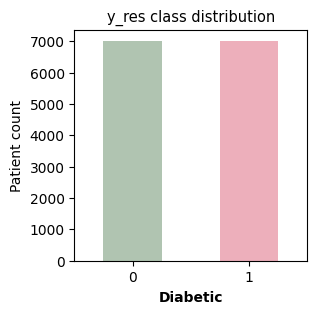

In [ ]:
# plot the value count of each class in y_res
y_res.value_counts().plot.bar(figsize=(3.0, 3.0),
                                layout='constrained',
                                color=['#b0c4b1', '#edafbb'],
                                rot = 0)

plt.ylabel('Patient count')
plt.xlabel('Diabetic', weight='black')
plt.title('y_res class distribution', fontsize=10.5)
plt.show()

### **Modelling with the oversampled data**

In [ ]:
%%time
# pipeline with preprocesser + estimator
forest_model2 = Pipeline(steps=[
    #(name, transformer/estimator)
    ('preprocess', preprocesser),
    ('rfc', RandomForestClassifier(n_jobs=-1,
                                   random_state=72))
])

# train the model
forest_model2.fit(X_res, y_res)

# predict
y_pred2 = forest_model2.predict(X_test)

CPU times: user 8.6 s, sys: 43 ms, total: 8.65 s
Wall time: 6.4 s


#### Visualize `confusion_matrix`

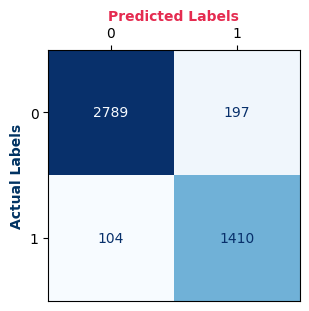

In [ ]:
# confusion matrix
plot_confusion_matrix(y_test, y_pred2)

#### [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
# classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2986
           1       0.88      0.93      0.90      1514

    accuracy                           0.93      4500
   macro avg       0.92      0.93      0.93      4500
weighted avg       0.93      0.93      0.93      4500



#### Visualize [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) and [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

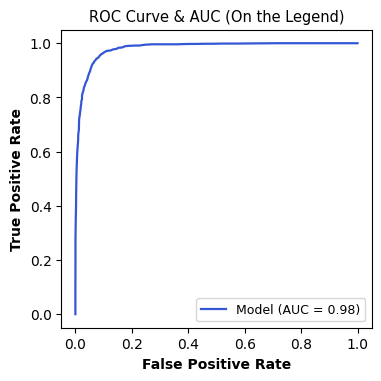

In [ ]:
# roc_curve + auc
plot_roc_curve(forest_model2, X_test, y_test)

> ▶️ **Up Next**  

> We'll tinker with the code and implement the following
+ [`CatBoostClassifier`](https://catboost.ai/en/concepts/python-reference_catboostclassifier) and optimize its hyperparameters using [`Optuna`](https://optuna.readthedocs.io/en/stable/index.html)
+ Tune `ROC Curve` decision threshold